In [15]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Question 1
input_weights = [[0.1, 0.2, 0.3], 
                 [0.4, 0.5, 0.6], 
                 [0.7, 0.8, 0.9], 
                 [1.0, 1.1, 1.2]] 
 
hidden_weights = [[1.3, 1.4, 1.5, 1.6], 
                  [1.7, 1.8, 1.9, 2.0]] 
 
output_weights = [[2.1, 2.2], 
                  [2.3, 2.4], 
                  [2.5, 2.6], 
                  [2.7, 2.8]]

hidden_biases = [0.9, 1.0, 1.1, 1.2] 
output_biases = [1.3, 1.4]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def feedforward(input):
    hidden_layer = sigmoid(np.dot(input, np.transpose(input_weights)) + hidden_biases)
    output_layer = sigmoid(np.dot(hidden_layer, np.transpose(hidden_weights)) + output_biases)
    return output_layer

input_vector = [0.1, 0.2, 0.3]
output = feedforward(input_vector)
print(output)

[0.99753123 0.9993846 ]


In [23]:
# Question 2

# Import libraries
import random
# Genetic Algorithm parameters
population_size = 50
city_count = 10
mutation_rate = 0.1
termination_condition = 1000

# Initialize population
def initialize_population():
    population = []
    for _ in range(population_size):
        chromosome = list(range(1, city_count+1))
        random.shuffle(chromosome)
        population.append(chromosome)
    return population

# Define fitness function
def fitness_function(chromosome):
    distance = 0
    for i in range(city_count-1):
        distance += distances[chromosome[i]-1][chromosome[i+1]-1]
    return distance
    
# Evaluate population
def evaluate_population(population):
    fitness_scores = []
    for chromosome in population:
        fitness_scores.append(fitness_function(chromosome))
    return fitness_scores

# Selection (tournament selection)
def selection(population, fitness_scores):
    selected_population = []
    for _ in range(population_size):
        tournament = random.sample(range(population_size), 5)
        selected_chromosome = min(tournament, key=lambda x: fitness_scores[x])
        selected_population.append(population[selected_chromosome])
    return selected_population

# Crossover (partially-mapped crossover)
def crossover(parent1, parent2):
    child = [None] * city_count
    gene1 = random.randint(0, city_count-1)
    gene2 = random.randint(0, city_count-1)
    start_gene = min(gene1, gene2)
    end_gene = max(gene1, gene2)
    for i in range(start_gene, end_gene+1):
        child[i] = parent1[i]
    for i in range(city_count):
        if child[i] is None:
            for j in range(city_count):
                if parent2[j] not in child:
                    child[i] = parent2[j]
                    break
    return child

# Mutation (swap mutation)
def mutation(chromosome):
    for i in range(city_count):
        if random.random() < mutation_rate:
            j = random.randint(0, city_count-1)
            chromosome[i], chromosome[j] = chromosome[j], chromosome[i]
    return chromosome

# Load distances between cities (example data)
distances = [
    [0, 2, 9, 10, 5, 1, 12, 6, 3, 8],
    [2, 0, 6, 4, 8, 9, 2, 11, 7, 5],
    [9, 6, 0, 11, 10, 7, 6, 3, 2, 1],
    [10, 4, 11, 0, 3, 12, 5, 9, 6, 7],
    [5, 8, 10, 3, 0, 6, 8, 4, 1, 2],
    [1, 9, 7, 12, 6, 0, 10, 5, 2, 4],
    [12, 2, 6, 5, 8, 10, 0, 7, 3, 9],
    [6, 11, 3, 9, 4, 5, 7, 0, 12, 1],
    [3, 7, 2, 6, 1, 2, 3, 12, 0, 10],
    [8, 5, 1, 7, 2, 4, 9, 1, 10, 0]
]

# Genetic Algorithm main loop
generation = 0
population = initialize_population()

while generation < termination_condition:
    # Evaluation
    fitness_scores = evaluate_population(population)

    # Termination condition
    if min(fitness_scores) == 0:
        break

    # Selection
    selected_population = selection(population, fitness_scores)

    # Crossover
    crossovered_population = []
    for i in range(0, population_size, 2):
        child1 = crossover(selected_population[i], selected_population[i+1])
        child2 = crossover(selected_population[i+1], selected_population[i])
        crossovered_population.append(child1)
        crossovered_population.append(child2)

    # Mutation
    mutated_population = []
    for chromosome in crossovered_population:
        mutated_population.append(mutation(chromosome))

    # Update population
    population = mutated_population
    generation += 1

# Print the best solution
best_chromosome = population[fitness_scores.index(min(fitness_scores))]
print("Best Solution:", best_chromosome)

Best Solution: [3, 8, 10, 5, 4, 6, 1, 2, 7, 9]


In [18]:
# Question 3

import pandas as pd

data = pd.read_csv('driver.csv')

                 id  mean_dist_day  mean_over_speed_perc
count  4.000000e+03    3994.000000           3996.000000
mean   3.423312e+09      77.757086             10.704705
std    1.154845e+03      77.379870             13.699562
min    3.423310e+09      15.520000              0.000000
25%    3.423311e+09      45.252500              4.000000
50%    3.423312e+09      53.335000              6.000000
75%    3.423313e+09      65.757500              9.000000
max    3.423314e+09    3100.000000            100.000000


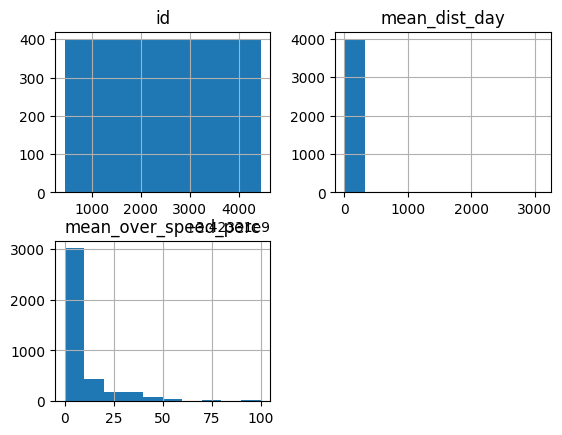

In [19]:
# describe the data
print(data.describe())

# histogram of the data
data.hist()

# Pre-processing (replacing missing values)
data = data.fillna(data.mean())

# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

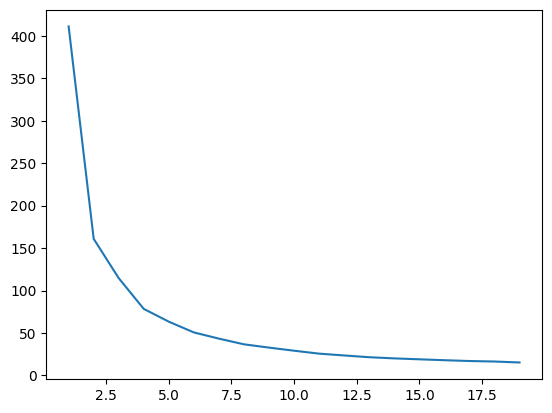

In [20]:
# Elbow Curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

temp = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    temp.append(kmeans.inertia_)

plt.plot(range(1, 20), temp)
plt.show()

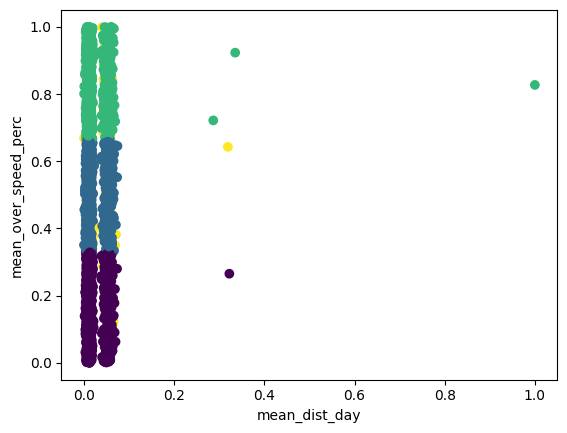

In [21]:
# applying kmeans for k = 4 (optimal value)

kmeans = KMeans(n_clusters = 4)
kmeans.fit(data)
labels = kmeans.labels_

# assigning labels to the data
data = pd.DataFrame(data)
data['labels'] = labels

# plotting the clusters
plt.scatter(data[1], data[0], c = data['labels'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()